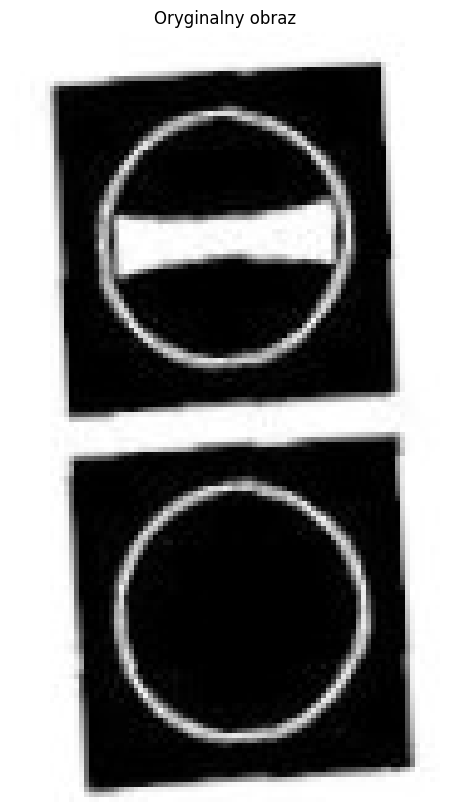

In [15]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('scheme002.jpg')


plt.figure(figsize=(10, 10))
plt.title('Oryginalny obraz')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


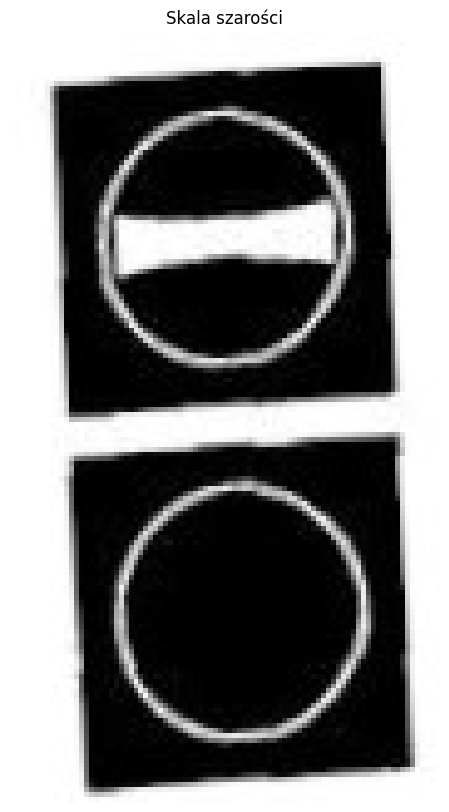

In [16]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
plt.title('Skala szarości')
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()


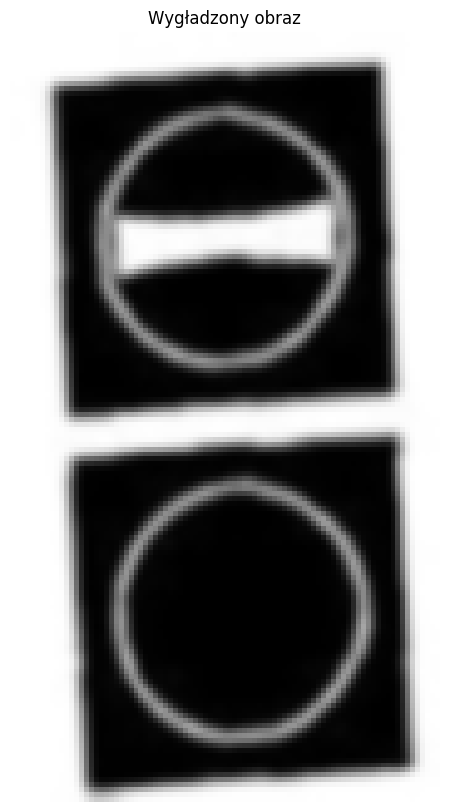

In [17]:


filtered = cv2.GaussianBlur(gray, (5, 5), 0)
plt.figure(figsize=(10, 10))
plt.title('Wygładzony obraz')
plt.imshow(filtered, cmap='gray')
plt.axis('off')
plt.show()


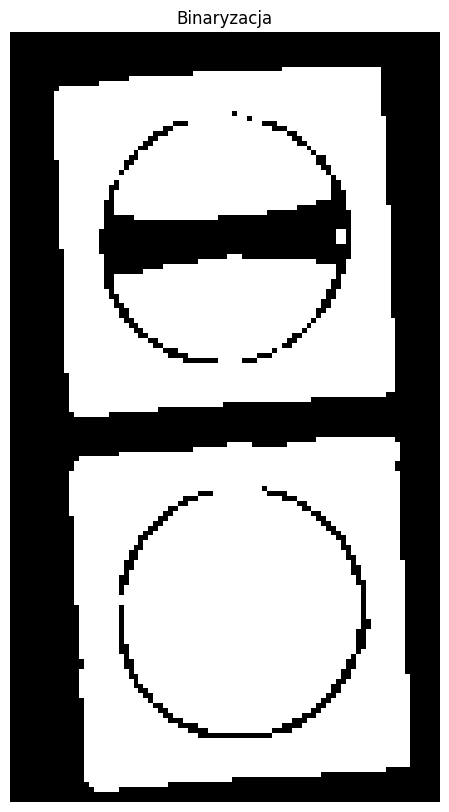

In [18]:


_, binary = cv2.threshold(filtered, 127, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10, 10))
plt.title('Binaryzacja')
plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.show()


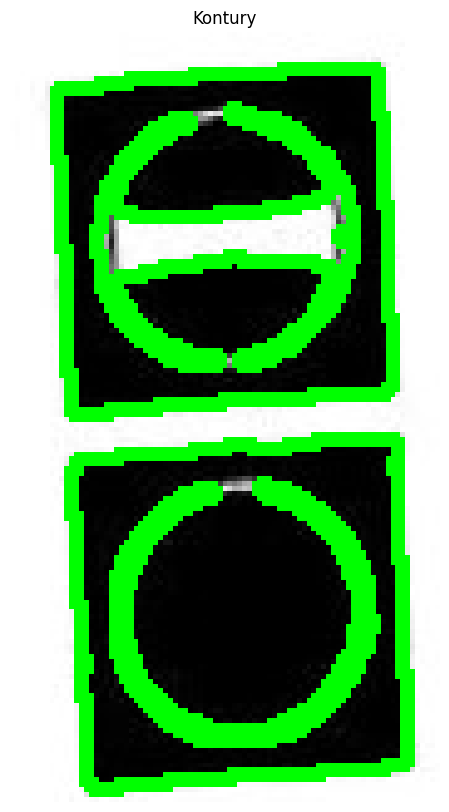

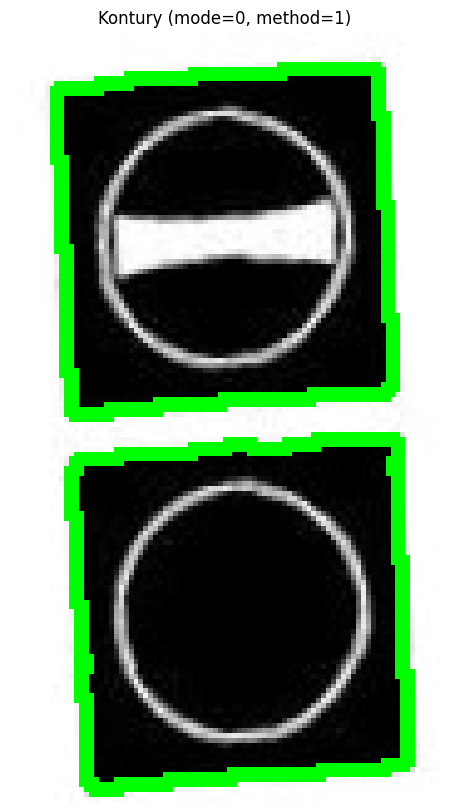

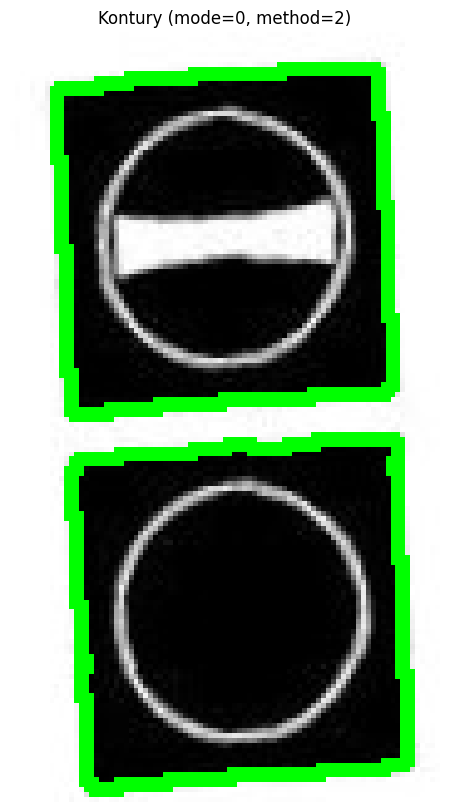

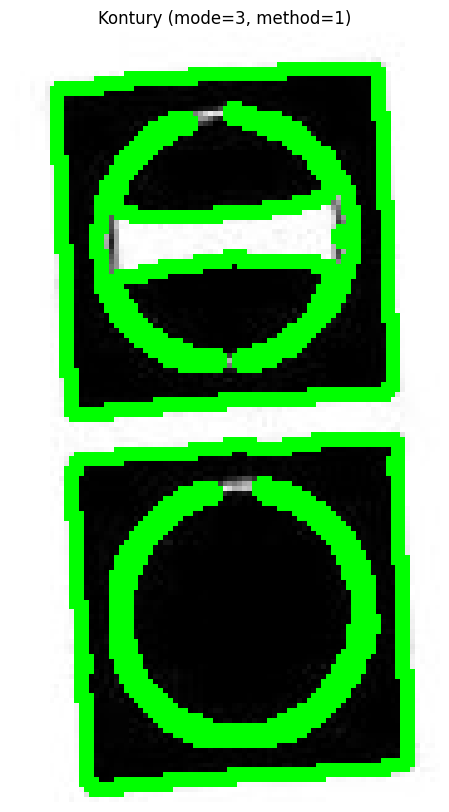

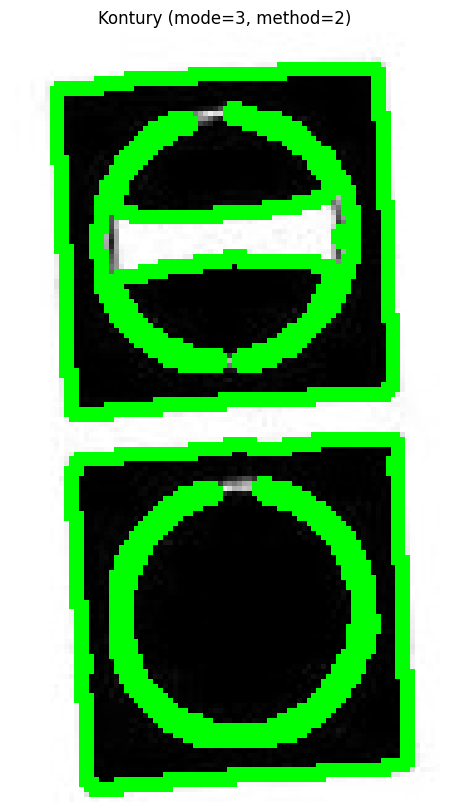

In [19]:


contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_image = np.copy(image)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(10, 10))
plt.title('Kontury')
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


contours_list = []
methods = [(cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE), (cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE),
           (cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE), (cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)]

for mode, method in methods:
    contours, _ = cv2.findContours(binary, mode, method)
    contour_image = np.copy(image)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
    contours_list.append((mode, method, contour_image))

for i, (mode, method, contour_image) in enumerate(contours_list):
    plt.figure(figsize=(10, 10))
    plt.title(f'Kontury (mode={mode}, method={method})')
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [20]:

"""# 4. Aproksymacja konturów i identyfikacja kształtów
approx_image = np.copy(image)
for contour in contours:
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # Identify shapes based on the number of vertices
    vertices = len(approx)
    shape = "Nieznany"
    if vertices == 3:
        shape = "Trójkąt"
    elif vertices == 4:
        x, y, w, h = cv2.boundingRect(approx)
        if abs(w - h) <= 3:
            shape = "Kwadrat"
        else:
            aspect_ratio = w / float(h)
            if aspect_ratio > 1:
                shape = "Kreska pozioma"  # Pozioma kreska
            else:
                shape = "Kreska pionowa"  # Pionowa kreska
    elif vertices > 4:
        (x, y), (MA, ma), angle = cv2.fitEllipse(contour)
        aspect_ratio = MA / ma
        if abs(aspect_ratio - 1) < 0.1:
            shape = "Okrąg"
        else:
            shape = "Elipsa"
    
    # Draw the approximated contour and the shape name
    cv2.drawContours(approx_image, [approx], -1, (0, 255, 0), 2)
    x, y = approx[0][0]
    cv2.putText(approx_image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.title('Aproksymacja konturów i identyfikacja kształtów')
plt.imshow(cv2.cvtColor(approx_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()"""


'# 4. Aproksymacja konturów i identyfikacja kształtów\napprox_image = np.copy(image)\nfor contour in contours:\n    epsilon = 0.01 * cv2.arcLength(contour, True)\n    approx = cv2.approxPolyDP(contour, epsilon, True)\n    \n    # Identify shapes based on the number of vertices\n    vertices = len(approx)\n    shape = "Nieznany"\n    if vertices == 3:\n        shape = "Trójkąt"\n    elif vertices == 4:\n        x, y, w, h = cv2.boundingRect(approx)\n        if abs(w - h) <= 3:\n            shape = "Kwadrat"\n        else:\n            aspect_ratio = w / float(h)\n            if aspect_ratio > 1:\n                shape = "Kreska pozioma"  # Pozioma kreska\n            else:\n                shape = "Kreska pionowa"  # Pionowa kreska\n    elif vertices > 4:\n        (x, y), (MA, ma), angle = cv2.fitEllipse(contour)\n        aspect_ratio = MA / ma\n        if abs(aspect_ratio - 1) < 0.1:\n            shape = "Okrąg"\n        else:\n            shape = "Elipsa"\n    \n    # Draw the approxi